In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import ast

In [90]:
df = pd.read_csv('data/cleaning_data.csv')
df.drop(['No', 'Release_Data'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3318 entries, 0 to 3317
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            3318 non-null   object 
 1   Theater_counts   3318 non-null   int64  
 2   Opening_Weekend  3318 non-null   int64  
 3   Budget           3318 non-null   int64  
 4   Cast             3318 non-null   object 
 5   Crew             3318 non-null   object 
 6   Studios          3318 non-null   object 
 7   Genre            3318 non-null   object 
 8   Languages        3318 non-null   object 
 9   Countries        3318 non-null   object 
 10  Runtime          3318 non-null   int64  
 11  Gross_worldwide  3318 non-null   int64  
 12  Rating           3318 non-null   float64
 13  MPAA             3318 non-null   object 
 14  Release_Year     3318 non-null   int64  
 15  Release_Month    3318 non-null   int64  
 16  Release_Day      3318 non-null   int64  
dtypes: float64(1),

In [91]:
df['Cast'] = df['Cast'].apply(ast.literal_eval)
df['Cast'] = df['Cast'].apply(lambda x: x[:3])
df['Crew'] = df['Crew'].apply(ast.literal_eval)
df['Crew'] = df['Crew'].apply(lambda x: x[:3])
df['Studios'] = df['Studios'].apply(ast.literal_eval)
df['Studios'] = df['Studios'].apply(lambda x: x[:3])
df['Genre'] = df['Genre'].apply(ast.literal_eval)
df['Genre'] = df['Genre'].apply(lambda x: x[:3])
df['Languages'] = df['Languages'].apply(ast.literal_eval)
df['Languages'] = df['Languages'].apply(lambda x: x[:3])
df['Countries'] = df['Countries'].apply(ast.literal_eval)
df['Countries'] = df['Countries'].apply(lambda x: x[:3])
df['MPAA'] = df['MPAA'].apply(ast.literal_eval)
df['MPAA'] = df['MPAA'].apply(lambda x: x[:3])

In [92]:
df_cast = df.explode('Cast')
print(len(df_cast.Cast.unique()))
df_cre = df.explode('Crew')
print(len(df_cre.Crew.unique()))
df_stu = df.explode('Studios')
print(len(df_stu.Studios.unique()))
df_con = df.explode('Countries')
print(len(df_con.Countries.unique()))
df_lan = df.explode('Languages')
print(len(df_lan.Languages.unique()))
df_gen = df.explode('Genre')
print(len(df_gen.Genre.unique()))

3360
4163
2403
64
120
23


In [93]:
df_actor_movie_count = df_cast.groupby('Cast').size().sort_values(ascending=False)
df_actor_movie_count.rename('Number_of_movies', inplace=True)
df_actor_movie_revenue = df_cast.groupby('Cast')['Gross_worldwide'].sum().sort_values(ascending=False)
df_actor_movie_revenue = df_actor_movie_revenue.reset_index()
df_actor_movie_count = df_actor_movie_count.reset_index()
df_actor_movie_count.head()
df_actor_movie = pd.merge(df_actor_movie_count, df_actor_movie_revenue, on='Cast')
df_actor_movie = df_actor_movie[df_actor_movie['Number_of_movies'] > 7]
df_actor_movie = df_actor_movie[df_actor_movie['Gross_worldwide'] > 1750000000]
df_actor_movie.reset_index(drop=True, inplace=True) 
df_actor_movie.shape

(173, 3)

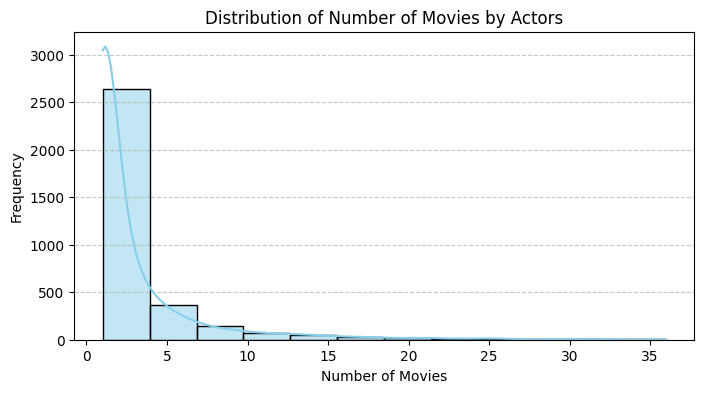

In [94]:
plt.figure(figsize=(8, 4))
sns.histplot(df_actor_movie_count['Number_of_movies'], bins=12, kde=True, color='skyblue')
plt.title('Distribution of Number of Movies by Actors')
plt.xlabel('Number of Movies')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

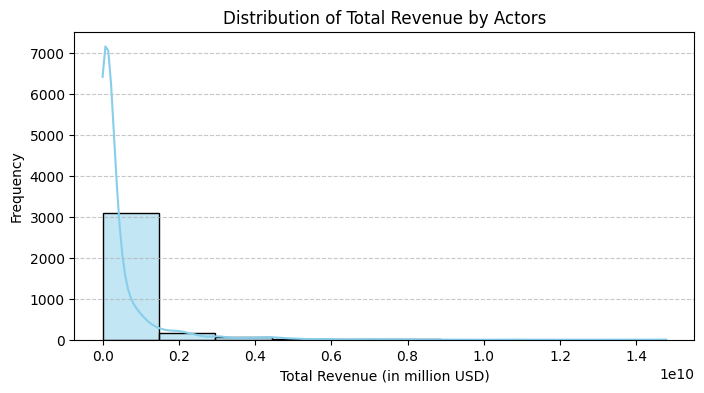

In [95]:
plt.figure(figsize=(8, 4))
sns.histplot(df_actor_movie_revenue['Gross_worldwide'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Total Revenue by Actors')
plt.xlabel('Total Revenue (in million USD)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [96]:
df_crew_movie_count = df_cre.groupby('Crew').size().sort_values(ascending=False)
df_crew_movie_count.rename('Number_of_movies', inplace=True)
df_crew_movie_revenue = df_cre.groupby('Crew')['Gross_worldwide'].sum().sort_values(ascending=False)
df_crew_movie_revenue = df_crew_movie_revenue.reset_index()
df_crew_movie_count = df_crew_movie_count.reset_index()
df_crew_movie = pd.merge(df_crew_movie_count, df_crew_movie_revenue, on='Crew')
df_crew_movie = df_crew_movie[df_crew_movie['Number_of_movies'] > 6]
df_crew_movie = df_crew_movie[df_crew_movie['Gross_worldwide'] > 1000000000]
df_crew_movie.reset_index(drop=True, inplace=True) 
df_crew_movie.shape

(128, 3)

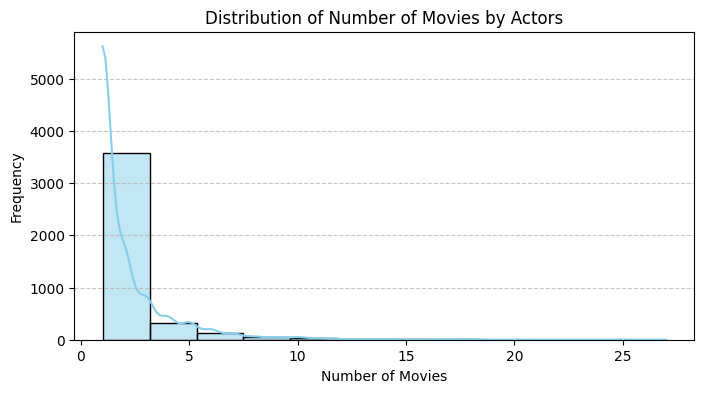

In [97]:
plt.figure(figsize=(8, 4))
sns.histplot(df_crew_movie_count['Number_of_movies'], bins=12, kde=True, color='skyblue')
plt.title('Distribution of Number of Movies by Actors')
plt.xlabel('Number of Movies')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

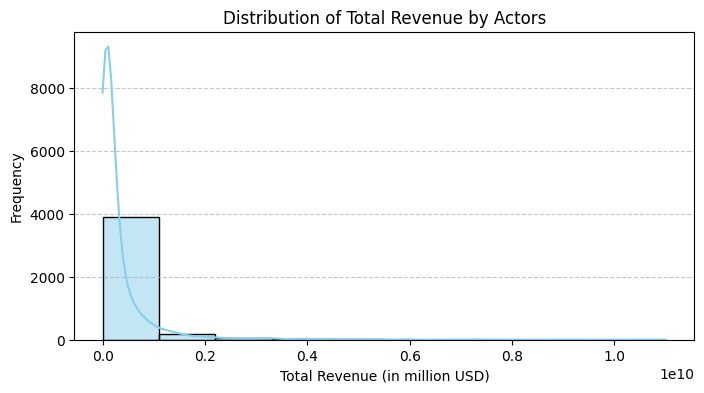

In [98]:
plt.figure(figsize=(8, 4))
sns.histplot(df_crew_movie_revenue['Gross_worldwide'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Total Revenue by Actors')
plt.xlabel('Total Revenue (in million USD)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [99]:
df_studios_movie_count = df_stu.groupby('Studios').size().sort_values(ascending=False)
df_studios_movie_count.rename('Number_of_movies', inplace=True)
df_studios_movie_revenue = df_stu.groupby('Studios')['Gross_worldwide'].sum().sort_values(ascending=False)
df_studios_movie_revenue = df_studios_movie_revenue.reset_index()
df_studios_movie_count = df_studios_movie_count.reset_index()
df_studios_movie = pd.merge(df_studios_movie_count, df_studios_movie_revenue, on='Studios')
df_studios_movie = df_studios_movie[df_studios_movie['Number_of_movies'] > 25]
df_studios_movie = df_studios_movie[df_studios_movie['Gross_worldwide'] > 7000000000]
df_studios_movie.reset_index(drop=True, inplace=True)
df_studios_movie.shape

(19, 3)

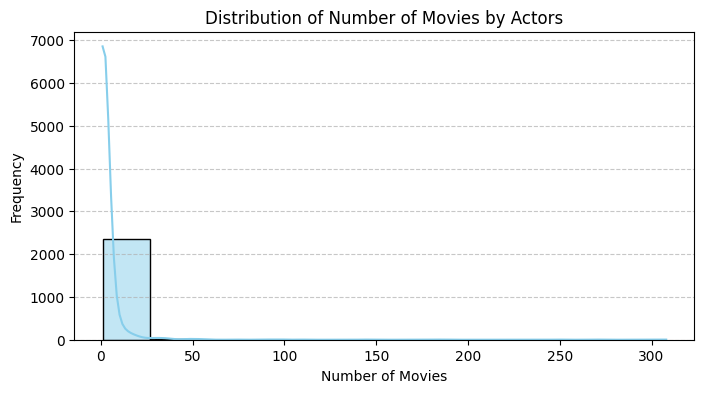

In [100]:
plt.figure(figsize=(8, 4))
sns.histplot(df_studios_movie_count['Number_of_movies'], bins=12, kde=True, color='skyblue')
plt.title('Distribution of Number of Movies by Actors')
plt.xlabel('Number of Movies')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

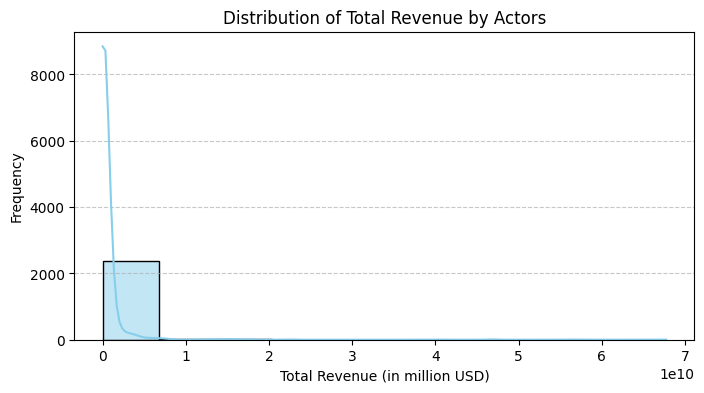

In [101]:
plt.figure(figsize=(8, 4))
sns.histplot(df_studios_movie_revenue['Gross_worldwide'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Total Revenue by Actors')
plt.xlabel('Total Revenue (in million USD)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [102]:
actor_selected = df_actor_movie['Cast'].values
crew_selected = df_crew_movie['Crew'].values
studios_selected = df_studios_movie['Studios'].values

In [103]:
df_actor_movie_selected = df_cast[df_cast['Cast'].isin(actor_selected)]
df_actor_movie_selected = df_actor_movie_selected[['Title', 'Cast']]
df_actor_movie_selected = pd.get_dummies(df_actor_movie_selected, columns=['Cast'], prefix='actor_', prefix_sep='')
df_actor_movie_selected = df_actor_movie_selected.groupby('Title').sum()
df_actor_movie_selected.reset_index(inplace=True)

In [104]:
df_crew_movie_selected = df_cre[df_cre['Crew'].isin(crew_selected)]
df_crew_movie_selected = df_crew_movie_selected[['Title', 'Crew']]
df_crew_movie_selected = pd.get_dummies(df_crew_movie_selected, columns=['Crew'], prefix='crew_', prefix_sep='')
df_crew_movie_selected = df_crew_movie_selected.groupby('Title').sum()
df_crew_movie_selected.reset_index(inplace=True)
df_crew_movie_selected.shape

(982, 129)

In [105]:
df_studios_movie_selected = df_stu[df_stu['Studios'].isin(studios_selected)]
df_studios_movie_selected = df_studios_movie_selected[['Title', 'Studios']]
df_studios_movie_selected = pd.get_dummies(df_studios_movie_selected, columns=['Studios'], prefix='studio_', prefix_sep='')
df_studios_movie_selected = df_studios_movie_selected.groupby('Title').sum()
df_studios_movie_selected.reset_index(inplace=True)
df_studios_movie_selected.head()

,Title,studio_Amblin Entertainment,studio_Columbia Pictures,studio_DreamWorks Animation,studio_Dreamworks Pictures,studio_Fox 2000 Pictures,studio_Imagine Entertainment,studio_Legendary Entertainment,studio_Metro-Goldwyn-Mayer (MGM),studio_New Line Cinema,studio_New Regency Productions,studio_Paramount Pictures,studio_Relativity Media,studio_Touchstone Pictures,studio_Twentieth Century Fox,studio_Universal Pictures,studio_Village Roadshow Pictures,studio_Walt Disney Animation Studios,studio_Walt Disney Pictures,studio_Warner Bros.
0,*batteries not included,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,10 Cloverfield Lane,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,10 Things I Hate About You,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,101 Dalmatians,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
4,102 Dalmatians,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [106]:
df_languages_movie = df_lan.groupby('Languages').size().sort_values(ascending=False)
df_languages_movie.rename('Number_of_movies', inplace=True)
df_languages_movie = df_languages_movie.reset_index()
df_languages_movie = df_languages_movie[df_languages_movie['Number_of_movies'] > 250]
df_languages_movie.reset_index(drop=True, inplace=True)
df_languages_movie

,Languages,Number_of_movies
0,English,3235
1,Spanish,382
2,French,317


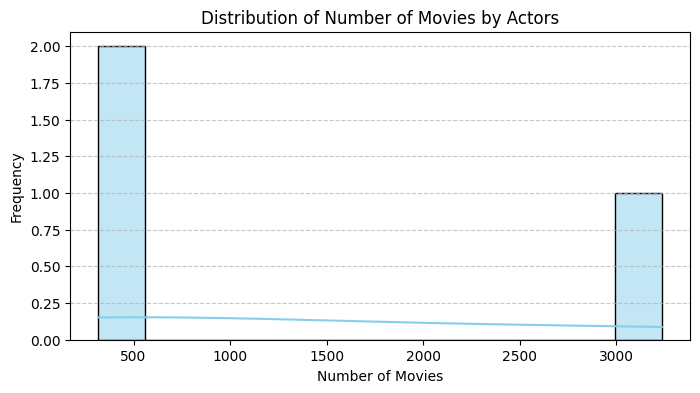

In [107]:
plt.figure(figsize=(8, 4))
sns.histplot(df_languages_movie['Number_of_movies'], bins=12, kde=True, color='skyblue')
plt.title('Distribution of Number of Movies by Actors')
plt.xlabel('Number of Movies')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [108]:
df_con_movie = df_con.groupby('Countries').size().sort_values(ascending=False)
df_con_movie.rename('Number_of_movies', inplace=True)
df_con_movie = df_con_movie.reset_index()
df_con_movie = df_con_movie[df_con_movie['Number_of_movies'] > 250]
df_con_movie.reset_index(drop=True, inplace=True)
df_con_movie

,Countries,Number_of_movies
0,United States,3072
1,United Kingdom,572
2,Canada,277


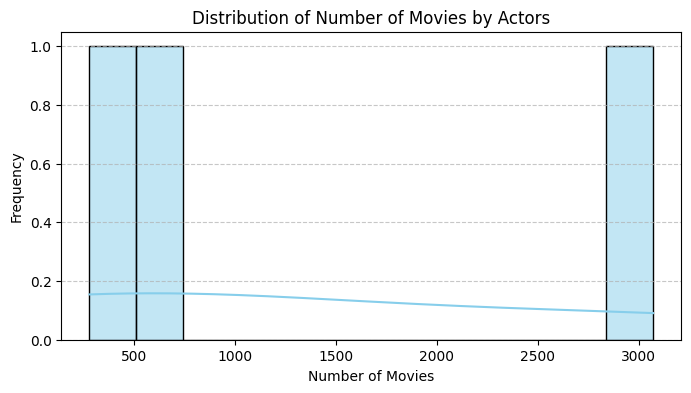

In [109]:
plt.figure(figsize=(8, 4))
sns.histplot(df_con_movie['Number_of_movies'], bins=12, kde=True, color='skyblue')
plt.title('Distribution of Number of Movies by Actors')
plt.xlabel('Number of Movies')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [110]:
col_to_explode = ['MPAA', 'Genre']

for col in col_to_explode:
    df_explode = df.explode(col)
    dummies = pd.get_dummies(df_explode[col], prefix=col, prefix_sep='_')
    dummies = dummies.groupby(dummies.columns, axis=1).sum()
    dummies.reset_index(inplace=True)
    df = df.join(dummies).drop(col, axis=1)
    df.drop('index', axis=1, inplace=True)
df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19272\2746009868.py:6: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  dummies = dummies.groupby(dummies.columns, axis=1).sum()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19272\2746009868.py:6: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  dummies = dummies.groupby(dummies.columns, axis=1).sum()


,Title,Theater_counts,Opening_Weekend,Budget,Cast,Crew,Studios,Languages,Countries,Runtime,...,Genre_Music,Genre_Musical,Genre_Mystery,Genre_News,Genre_Romance,Genre_Sci-Fi,Genre_Sport,Genre_Thriller,Genre_War,Genre_Western
0,Avatar,3452,77025481,237000000,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron],"[Twentieth Century Fox, Dune Entertainment, Li...","[English, Spanish]",[United States],162,...,0,0,0,0,0,0,0,0,0,0
1,Avengers: Endgame,4662,357115007,356000000,"[Robert Downey Jr., Chris Evans, Mark Ruffalo]","[Stan Lee, Joe Russo, Christopher Markus]","[Marvel Studios, Walt Disney Pictures]","[English, Japanese, Xhosa]",[United States],181,...,0,0,0,0,0,0,0,0,0,0
2,Titanic,2674,28638131,200000000,"[Leonardo DiCaprio, Kate Winslet, Billy Zane]",[James Cameron],"[Twentieth Century Fox, Paramount Pictures, Li...","[English, Swedish, Italian]","[United States, Mexico, Australia]",194,...,0,0,0,0,0,0,0,0,0,0
3,Avengers: Infinity War,4474,257698183,321000000,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...","[Stan Lee, Joe Russo, Christopher Markus]","[Marvel Studios, Jason Roberts Productions, So...",[English],[United States],149,...,0,0,0,0,0,0,0,0,0,0
4,Jurassic World,4274,208806270,150000000,"[Chris Pratt, Bryce Dallas Howard, Ty Simpkins]","[Colin Trevorrow, Amanda Silver, Rick Jaffa]","[Universal Pictures, Amblin Entertainment, Leg...",[English],[United States],124,...,0,0,0,0,0,0,0,0,0,0


In [111]:
def parseWithMoneyAndCount(dataframe, col_name):
    res = []
    count = []
    gross = []

    for index, record in enumerate(dataframe[col_name]):
        for x in record:
            # Save results to corresponding array
            res.append(x)
            gross.append(dataframe['Gross_worldwide'][index])
            count.append(1)

    # Make dataframe; remove duplicates and sum corresponding columns
    t1 = pd.DataFrame({col_name: res, 'Total': gross, 'Count': count})
    result1 = t1.groupby(col_name).sum()
    result1.reset_index(inplace=True)

    t2 = pd.DataFrame({col_name: res, 'Mean': gross})
    result2 = t2.groupby(col_name).mean()
    result2.reset_index(inplace=True)

    result = result1.merge(result2, on=col_name, how='inner')

    t3 = pd.DataFrame({col_name: res, 'Median': gross})
    result3 = t3.groupby(col_name).median()
    result3.reset_index(inplace=True)

    result = result.merge(result3, on=col_name, how='inner')
    return result

In [112]:
genre = parseWithMoneyAndCount(df, 'Genre')
genre.head(2)

KeyError: 'Genre'

<Axes: xlabel='Genre'>

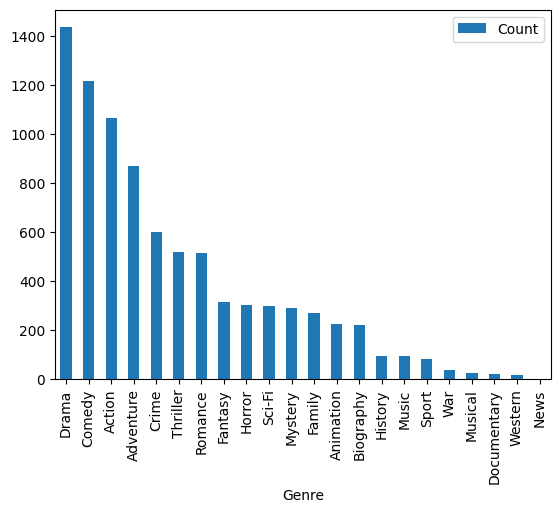

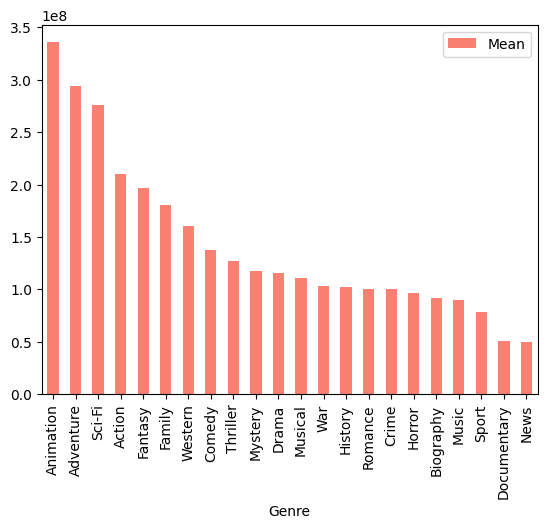

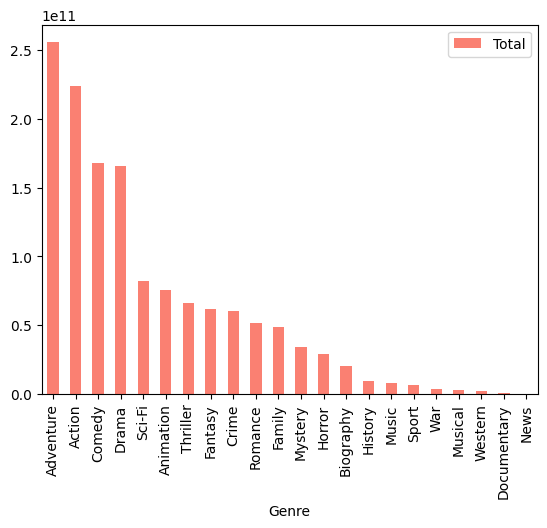

In [ ]:
genre.sort_values(by='Count', ascending=False, inplace=True)
genre.plot.bar(x='Genre', y='Count')
genre.sort_values(by='Mean', ascending=False, inplace=True)
genre.plot.bar(x='Genre', y='Mean', color="salmon")
genre.sort_values(by='Total', ascending=False, inplace=True)
genre.plot.bar(x='Genre', y='Total', color="salmon")

In [ ]:
mpaa = parseWithMoneyAndCount(df, 'MPAA')
mpaa.head(2)

,MPAA,Total,Count,Mean,Median
0,G,26250824875,166,1.581375e+08,64277340.5
1,NC-17,587290449,9,6.525449e+07,53425389.0


<Axes: xlabel='MPAA'>

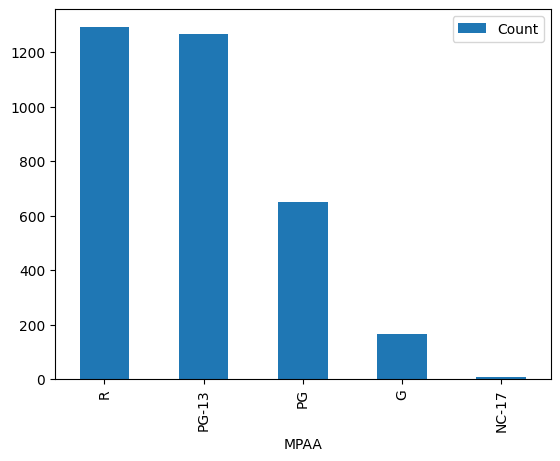

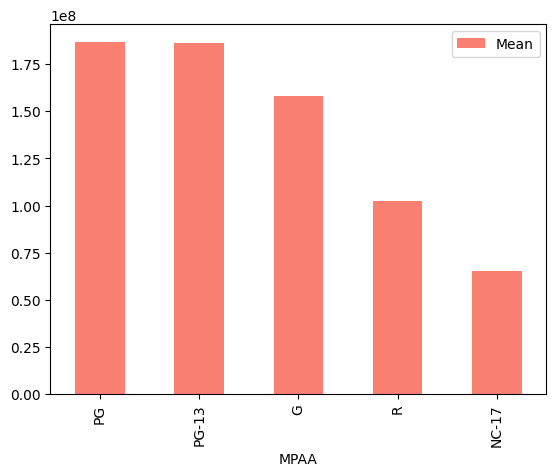

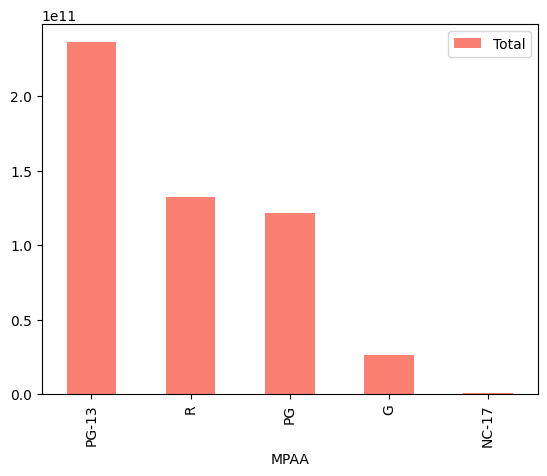

In [ ]:
mpaa.sort_values(by='Count', ascending=False, inplace=True)
mpaa.plot.bar(x='MPAA', y='Count')
mpaa.sort_values(by='Mean', ascending=False, inplace=True)
mpaa.plot.bar(x='MPAA', y='Mean', color="salmon")
mpaa.sort_values(by='Total', ascending=False, inplace=True)
mpaa.plot.bar(x='MPAA', y='Total', color="salmon")


In [113]:
df = df.merge(df_actor_movie_selected, on='Title', how='left')
df = df.merge(df_crew_movie_selected, on='Title', how='left')
df = df.merge(df_studios_movie_selected, on='Title', how='left')
df.shape

(3318, 362)

In [114]:
drop_column = ['Cast', 'Crew', 'Studios']
df.drop(drop_column, axis=1, inplace=True)

In [115]:
df['Is_English'] = df['Languages'].apply(lambda x: 'English' in x)
df.drop('Languages', axis=1, inplace=True)
df['Is_United_States'] = df['Countries'].apply(lambda x: 'United States' in x)
df.drop('Countries', axis=1, inplace=True)
df.head()

,Title,Theater_counts,Opening_Weekend,Budget,Runtime,Gross_worldwide,Rating,Release_Year,Release_Month,Release_Day,...,studio_Relativity Media,studio_Touchstone Pictures,studio_Twentieth Century Fox,studio_Universal Pictures,studio_Village Roadshow Pictures,studio_Walt Disney Animation Studios,studio_Walt Disney Pictures,studio_Warner Bros.,Is_English,Is_United_States
0,Avatar,3452,77025481,237000000,162,2847246203,7.8,2009,12,18,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,True,True
1,Avengers: Endgame,4662,357115007,356000000,181,2797501328,8.4,2019,4,26,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,True,True
2,Titanic,2674,28638131,200000000,194,2201647264,7.8,1997,12,18,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,True,True
3,Avengers: Infinity War,4474,257698183,321000000,149,2048359754,8.4,2018,4,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True
4,Jurassic World,4274,208806270,150000000,124,1670516444,7.0,2015,6,12,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,True,True


In [116]:
df.shape

(3318, 359)

In [117]:
df.fillna(0, inplace=True)
df.isnull().sum()
df.replace(True, 1, inplace=True)
df.replace(False, 0, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19272\1958232643.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(False, 0, inplace=True)


In [119]:
df.to_csv('data/feature_extract_data.csv', index=False)

In [127]:
df = df[df['Gross_worldwide'] > 10000000]
df['Gross_worldwide'].dewsribe()

AttributeError: 'Series' object has no attribute 'dewsribe'